In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"Data/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Calculating total null values
data.isna().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
data['workclass'] = data['workclass'].replace({'?': 'Others'})
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [7]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [8]:
data["occupation"] = data["occupation"].replace({'?':'Others'})
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [9]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [10]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [11]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [12]:
data.shape

(48811, 15)

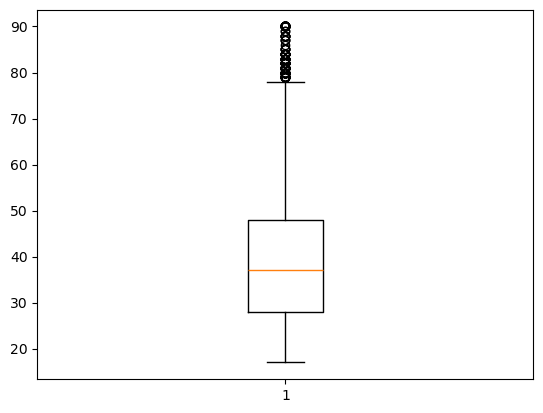

In [13]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [14]:
data=data[(data['age']<=75)&(data['age']>=17)]

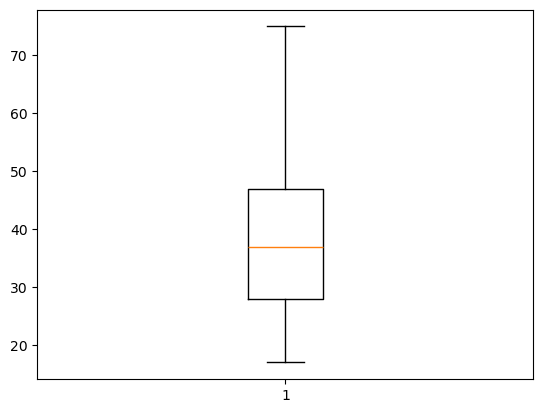

In [15]:
plt.boxplot(data['age'])
plt.show()

In [16]:
data.shape

(48438, 15)

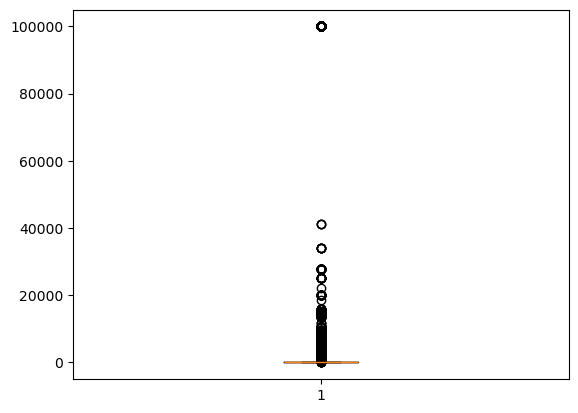

In [17]:
plt.boxplot(data['capital-gain'])
plt.show()

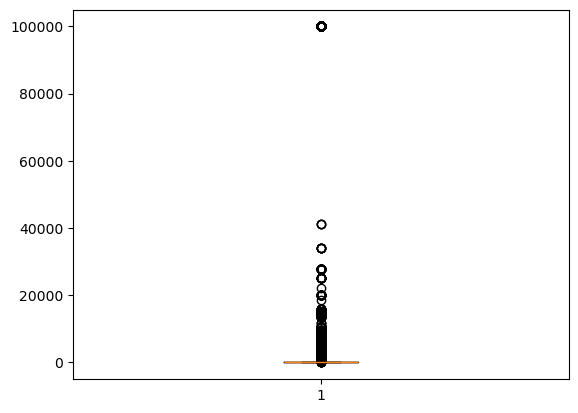

In [18]:
plt.boxplot(data['capital-gain'])
plt.show()

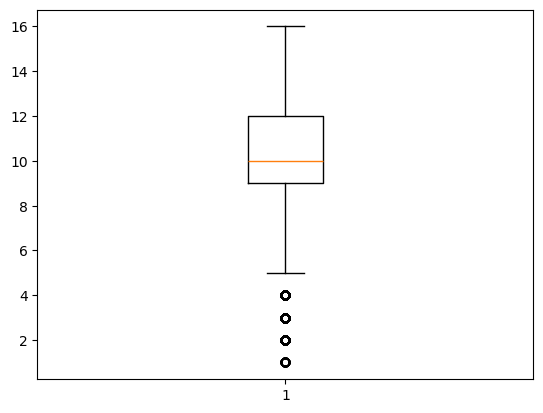

In [19]:
plt.boxplot(data['educational-num'])
plt.show()

In [20]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

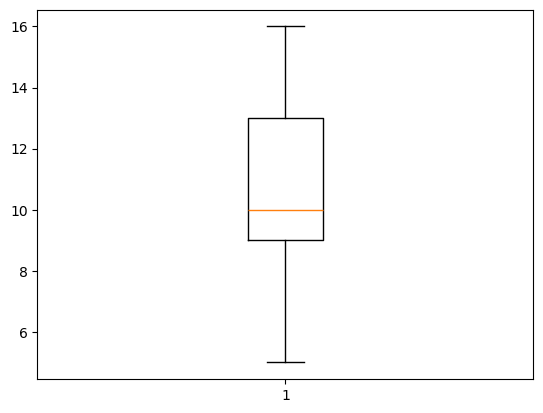

In [21]:
plt.boxplot(data['educational-num'])
plt.show()

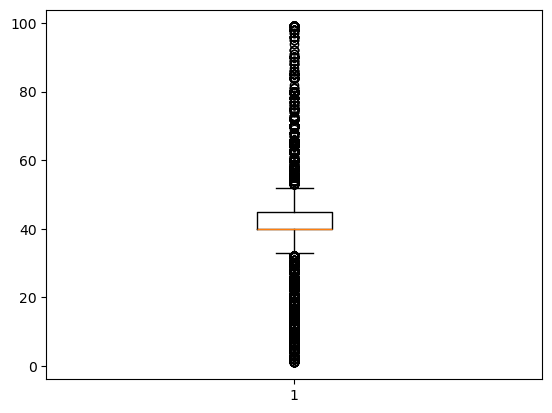

In [22]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [30]:
data=data.drop("relationship", axis = 1) #redundant feature

In [31]:
data

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,Others,Some-college,Never-married,Others,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [32]:
data.to_csv("adult_processed.csv", index = False)